In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
for i in range(10):
    locals()['data%d'%i]= np.loadtxt('train.'+str(i)+'.txt',delimiter = ',')
    
from sklearn.cross_validation import train_test_split
for i in range(10):
    locals()['data%d_train'%i],locals()['data%d_test'%i],locals()['label%d_train'%i],locals()['label%d_test'%i] = train_test_split(
        locals()['data%d'%i], i*np.ones(locals()['data%d'%i].shape[0]), test_size = 0.3, random_state = 0)

In [3]:
train_data = np.zeros((1,256))
label = []
for i in range(10):
    train_data = np.append(train_data,locals()['data%d_train'%i],axis = 0)
    label = np.append(label,locals()['label%d_train'%i])
train_data = train_data[1:,:]

train_data.shape

(5098, 256)

# PCA

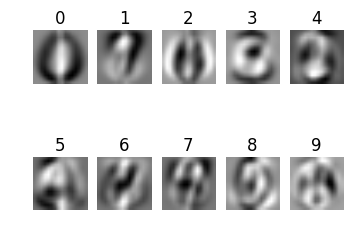

In [4]:
from sklearn import decomposition

num_components = 50
pca = decomposition.PCA(n_components=num_components)

X_digits = train_data
y_digits = label

pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(str(i))
    img = np.reshape(pca.components_[i,:],(16,16))
    imgshow = plt.imshow(img,cmap='gray')
    plt.axis('off')   #不显示坐标尺寸
    

X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))


In [5]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_digits_pca, y_digits) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
confusion_Matrix = np.zeros((10,10))
for i in range(10):
    feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
    prediction = clf.predict(feature)
    prediction = prediction.astype(int)
    for j in range(prediction.shape[0]):
        confusion_Matrix[i,prediction[j]]+= 1
print confusion_Matrix

[[ 353.    0.    4.    0.    0.    2.    0.    0.    0.    0.]
 [   0.  301.    0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    1.  217.    1.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    2.  194.    0.    0.    0.    0.    2.    0.]
 [   2.    0.    2.    0.  190.    0.    1.    0.    0.    1.]
 [   1.    0.    1.    1.    0.  163.    0.    0.    0.    1.]
 [   3.    0.    1.    0.    0.    0.  195.    0.    1.    0.]
 [   0.    0.    1.    0.    2.    0.    0.  187.    2.    2.]
 [   1.    0.    1.    1.    2.    3.    1.    1.  153.    0.]
 [   0.    0.    0.    1.    2.    0.    0.    0.    2.  189.]]


In [7]:
total = np.sum(confusion_Matrix)
hit = 0
for i in range(10):
    hit += confusion_Matrix[i,i]
accuracy = hit/total.astype(float)
print accuracy 

0.976744186047


# Choose of Kernel 

In [37]:
result_rbf = 0
ylabel = 0
from sklearn import svm

for s in range(30,100,5):
    num_components = s
    pca = decomposition.PCA(n_components=num_components)

    X_digits = train_data
    y_digits = label
    pca.fit(X_digits)
    X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

    clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')
    clf.fit(X_digits_pca, y_digits) 
    confusion_Matrix = np.zeros((10,10))
    for i in range(10):
        feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
        prediction = clf.predict(feature)
        prediction = prediction.astype(int)
    
        for j in range(prediction.shape[0]):
            confusion_Matrix[i,prediction[j]]+= 1
        
    total = np.sum(confusion_Matrix)
    hit = 0
    for i in range(10):
        hit += confusion_Matrix[i,i]
    accuracy = hit/total.astype(float)
    result_rbf = np.append(result_rbf,accuracy)
    ylabel = np.append(ylabel,s)
    
result_rbf = result_rbf[1:]
ylabel = ylabel[1:]

[ 0.          0.97309622  0.97400821  0.9744642   0.97583219  0.97674419
  0.97674419  0.97811218  0.97811218  0.97811218  0.97811218  0.97811218
  0.97765618  0.97765618  0.97674419]


In [41]:
result_p1 = 0
ylabel = 0
from sklearn import svm

for s in range(30,100,5):
    num_components = s
    pca = decomposition.PCA(n_components=num_components)

    X_digits = train_data
    y_digits = label
    pca.fit(X_digits)
    X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

    clf = svm.SVC(decision_function_shape='ovo',kernel='poly',degree = 1)
    clf.fit(X_digits_pca, y_digits) 
    confusion_Matrix = np.zeros((10,10))
    for i in range(10):
        feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
        prediction = clf.predict(feature)
        prediction = prediction.astype(int)
    
        for j in range(prediction.shape[0]):
            confusion_Matrix[i,prediction[j]]+= 1
        
    total = np.sum(confusion_Matrix)
    hit = 0
    for i in range(10):
        hit += confusion_Matrix[i,i]
    accuracy = hit/total.astype(float)
    result_p1 = np.append(result_p1,accuracy)
    ylabel = np.append(ylabel,s)
    
result_p1 = result_p1[1:]
ylabel = ylabel[1:]
print result_p1

[ 0.95668035  0.95941632  0.95713634  0.95941632  0.96032832  0.96078431
  0.95987232  0.95941632  0.95759234  0.95896033  0.95850433  0.95941632
  0.95987232  0.95896033]


In [69]:
result_p2 = 0
ylabel = 0
for s in range(30,100,5):
    num_components = s
    pca = decomposition.PCA(n_components=num_components)

    X_digits = train_data
    y_digits = label
    pca.fit(X_digits)
    X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

    clf = svm.SVC(decision_function_shape='ovo',kernel='poly',degree = 2)
    clf.fit(X_digits_pca, y_digits) 
    confusion_Matrix = np.zeros((10,10))
    for i in range(10):
        feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
        prediction = clf.predict(feature)
        prediction = prediction.astype(int)
    
        for j in range(prediction.shape[0]):
            confusion_Matrix[i,prediction[j]]+= 1
        
    total = np.sum(confusion_Matrix)
    hit = 0
    for i in range(10):
        hit += confusion_Matrix[i,i]
    accuracy = hit/total.astype(float)
    result_p2 = np.append(result_p2,accuracy)
    ylabel = np.append(ylabel,s)
    
result_p2 = result_p2[1:]
ylabel = ylabel[1:]
print result_p2

[ 0.9753762   0.9753762   0.97765618  0.97856817  0.97902417  0.97993616
  0.97902417  0.97856817  0.97765618  0.97811218  0.97720018  0.97811218
  0.97811218  0.97811218]


In [70]:
result_p4 = 0
ylabel = 0
from sklearn import svm

for s in range(30,100,5):
    num_components = s
    pca = decomposition.PCA(n_components=num_components)

    X_digits = train_data
    y_digits = label
    pca.fit(X_digits)
    X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

    clf = svm.SVC(decision_function_shape='ovo',kernel='poly',degree = 1)
    clf.fit(X_digits_pca, y_digits) 
    confusion_Matrix = np.zeros((10,10))
    for i in range(10):
        feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
        prediction = clf.predict(feature)
        prediction = prediction.astype(int)
    
        for j in range(prediction.shape[0]):
            confusion_Matrix[i,prediction[j]]+= 1
        
    total = np.sum(confusion_Matrix)
    hit = 0
    for i in range(10):
        hit += confusion_Matrix[i,i]
    accuracy = hit/total.astype(float)
    result_p4 = np.append(result_p4,accuracy)
    ylabel = np.append(ylabel,s)
    
result_p4 = result_p4[1:]
ylabel = ylabel[1:]
print result_p4

[ 0.95668035  0.95941632  0.95713634  0.95941632  0.96032832  0.96078431
  0.95987232  0.95941632  0.95759234  0.95896033  0.95850433  0.95941632
  0.95987232  0.95896033]


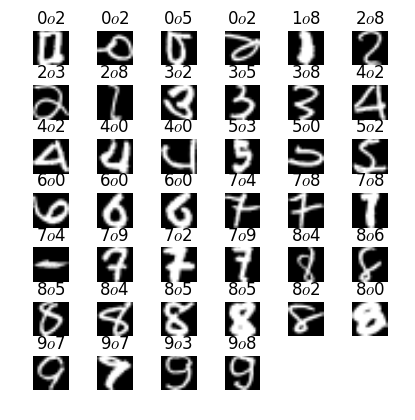

In [17]:
result_p3 = 0
ylabel = 0
error = np.zeros((1,3)) 
counter = 0

num_components = 80
pca = decomposition.PCA(n_components=num_components)

X_digits = train_data
y_digits = label
pca.fit(X_digits)
X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

clf = svm.SVC(decision_function_shape='ovo',kernel='poly',degree = 3)
clf.fit(X_digits_pca, y_digits) 


fig, axes = plt.subplots(7,6, figsize=(4, 4))


confusion_Matrix = np.zeros((10,10))
for i in range(10):
    feature = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
    prediction = clf.predict(feature)
    prediction = prediction.astype(int)
    for j in range(prediction.shape[0]):
        confusion_Matrix[i,prediction[j]]+= 1
        if i!=prediction[j]:
            
            img = np.reshape(locals()['data%d_test'%i][j,:],(16,16))
            ax = axes.ravel()[counter]
            ax.imshow(img,cmap ='gray')
            ax.set_title(str(i)+'$\to$'+str(prediction[j]))
            counter+= 1
for alpha in axes.ravel():
    alpha.axis('off')
fig.tight_layout(pad=0, h_pad=-1.5, w_pad=-1.8) 

plt.savefig('foo.jpg')

In [9]:
print counter

40


In [ ]:
            print i, prediction[j]
            img = np.reshape(locals()['data%d_test'%i][j,:],(16,16))
            imgshow = plt.imshow(img,cmap='gray')
            plt.axis('off')


total = np.sum(confusion_Matrix)
hit = 0
for i in range(10):
    hit += confusion_Matrix[i,i]
accuracy = hit/total.astype(float)
result_p3 = np.append(result_p3,accuracy)
ylabel = np.append(ylabel,s)

result_p3= result_p3[1:]
ylabel = ylabel[1:]
print result_p3

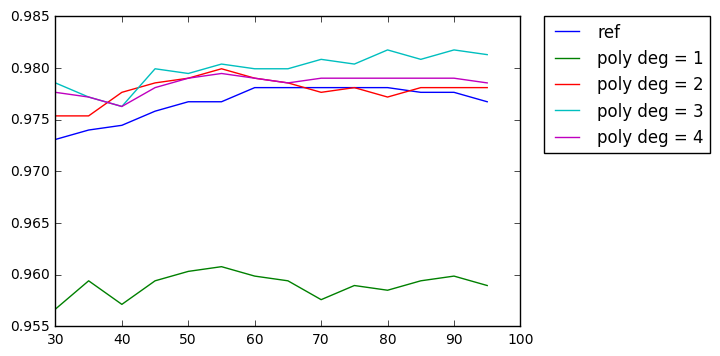

In [57]:

line1, = plt.plot(ylabel,result_rbf ,label="ref")
line2, = plt.plot(ylabel,result_p1 ,label="poly deg = 1")
line3, = plt.plot(ylabel,result_p2 ,label="poly deg = 2")
line4, = plt.plot(ylabel,result_p3 ,label="poly deg = 3")
line5, = plt.plot(ylabel,result_p4 ,label="poly deg = 4")


# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

plt.legend(handles=[line1,line2,line3,line4,line5])
# Add the legend manually to the current Axes.
# Add the legend manually to the current Axes.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Create another legend for the second line.
plt.savefig('svm.jpg')